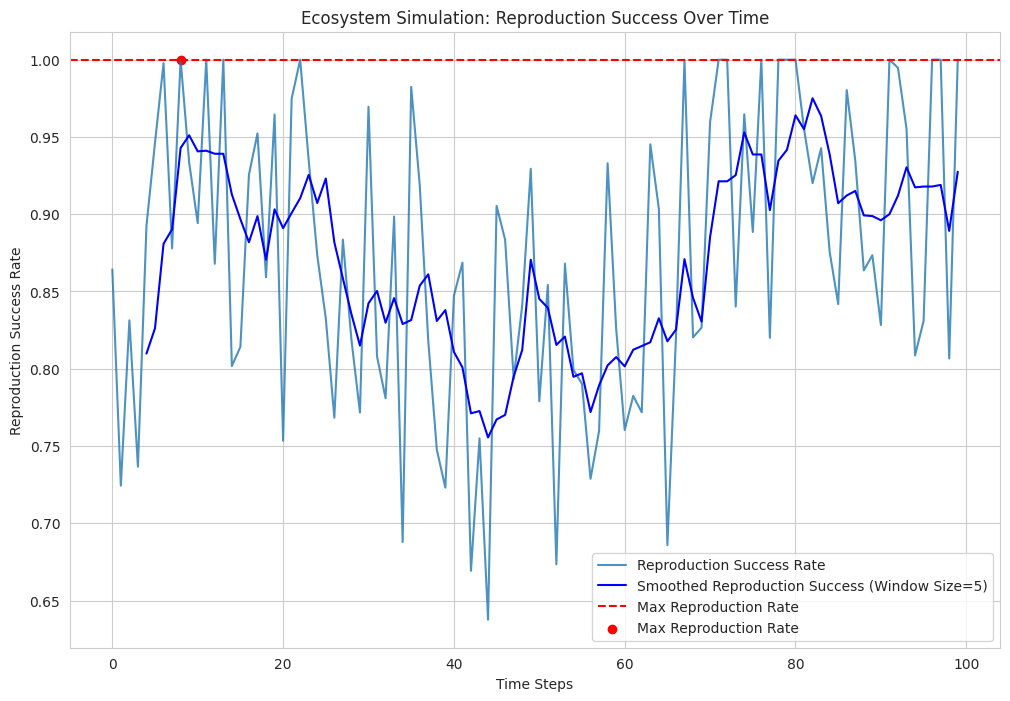

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class EelAgent:
    def __init__(self, gender, growth_rate):
        self.gender = gender
        self.growth_rate = growth_rate
        # Additional attributes can be defined as needed

class Ecosystem:
    def __init__(self, initial_gender_ratio, initial_resource_availability):
        self.gender_ratio = initial_gender_ratio  # Proportion of males
        self.resource_availability = initial_resource_availability
        self.agents = []
        self.reproduction_success_history = []

    def adjust_sex_ratio(self):
        """Adjust the gender ratio in the ecosystem based on various factors."""
        # Hypothetical rules:
        # Higher resource availability increases the growth rate, leading to more females
        # Environmental changes may affect the sex ratio
        # Random events introduce variability
        self.gender_ratio += 0.02 * (self.resource_availability - 0.5)  # Adjust based on resource availability
        self.gender_ratio += 0.01 * np.random.randn()  # Introduce random variation
        self.gender_ratio = min(max(self.gender_ratio, 0), 1)  # Ensure the gender ratio remains within [0, 1]

    def simulate(self, time_steps):
        for step in range(time_steps):
            # Adjust sex ratios and resource availability (simplified model)
            self.adjust_sex_ratio()
            
            # Simulate fluctuating resources with a bias towards stability
            resource_change = 0.1 * np.random.randn()  # Random resource fluctuation
            self.resource_availability = max(0, min(1, self.resource_availability + resource_change))
            
            # Calculate reproduction success with additional variability
            reproduction_success = 1 - abs(0.5 - self.gender_ratio) + 0.1 * np.random.randn()  # Example metric with added randomness
            reproduction_success = max(0, min(1, reproduction_success))  # Ensure reproduction success remains within [0, 1]
            
            self.reproduction_success_history.append(reproduction_success)

if __name__ == "__main__":
    initial_gender_ratio = 0.45
    initial_resource_availability = 0.05
    ecosystem = Ecosystem(initial_gender_ratio, initial_resource_availability)
    num_agents = 100
    for _ in range(num_agents):
        gender = np.random.choice(["male", "female"])
        growth_rate = np.random.uniform(low=0.1, high=0.6)
        agent = EelAgent(gender, growth_rate)
        ecosystem.agents.append(agent)
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Simulate 100 time steps
    ecosystem.simulate(100)
    
    # Smooth the reproduction success history using a moving average
    window_size = 5
    reproduction_success_smoothed = np.convolve(ecosystem.reproduction_success_history, np.ones(window_size)/window_size, mode='valid')

    # Visualization
    plt.figure(figsize=(12, 8))
    
    plt.plot(ecosystem.reproduction_success_history, label='Reproduction Success Rate', alpha=0.8)
    plt.plot(np.arange(window_size-1, 100), reproduction_success_smoothed, label=f'Smoothed Reproduction Success (Window Size={window_size})', color='blue')
    max_reproduction_rate_index = np.argmax(ecosystem.reproduction_success_history)
    plt.axhline(y=ecosystem.reproduction_success_history[max_reproduction_rate_index], color='red', linestyle='--', label='Max Reproduction Rate')
    plt.scatter(max_reproduction_rate_index, ecosystem.reproduction_success_history[max_reproduction_rate_index], color='red', marker='o', label='Max Reproduction Rate')

    plt.xlabel('Time Steps')
    plt.ylabel('Reproduction Success Rate')
    plt.legend()
    plt.title('Ecosystem Simulation: Reproduction Success Over Time')
    plt.grid(True)
    plt.show()
